# Exercice 7: Transformations, CRS, buffers, affichage et export
O. Kaufmann, 2020, 2022.

In [1]:
# @info: Exécutez-moi pour activer les questions interactives
# -----------------------------------------------------------

from IPython.display import HTML
import codecs

# @hidden
HTML('''
<script>
code_show=true;
function code_toggle() {
 if (code_show){
  $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 } else {
  $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<div># @info: Exécutez-moi pour activer les questions interactives </div>
''')

# @info: Exécutez-moi pour cacher le code, puis sauvegardez le notebook


***
## 1. Imports

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <b>pyproj :</b> pour gérer les projections et transformations entre projections  <br>
    <b>fiona :</b> pour lire et écrire des géodonnées aux formats standards  <br>
    <b>descartes :</b> pour afficher des objets shapely ou GeoJSON avec matplotlib
</div>

In [2]:
import matplotlib.pyplot as plt
import shapely
import fiona
from fiona.crs import from_epsg
import pyproj
from shapely.geometry import Point, LineString, MultiPoint, Polygon
from shapely.affinity import rotate, translate
from shapely.ops import transform
from descartes.patch import PolygonPatch
from collections import OrderedDict

***
## 2. Création des géométries

<div class="alert alert-block alert-info">
<b>Info:</b><br>     On a réalisé des relevés le long d'un profil passant par les trois repères A, B et C. Le profil démarre au point A, le point B se situe 100m au nord du point A et le point C à 150m du point B. L'azimuth de BC est de N50°E.<br>
    <br>
    Rem: On souhaite travailler dans le système de coordonnées Lambert Belge 1972, considère que les distances sont comptées dans le plan de la projection cartographique et que l'azimuth est compté par rapport au nord de la carte. Les segments entre les repères sont considérés rectilignes.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez un objet qui représentent les points de repères A, B et C.
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez les fonctions translate et rotate.
</div>

In [3]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303030223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030302220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e41203d20506f696e7428302c2030293c62723e0a42203d20506f696e7428302c20313030293c62723e0a43203d20506f696e7428302c20313530293c62723e0a43203d20726f7461746528432c202d35302c206f726967696e3d41293c62723e0a43203d207472616e736c61746528432c20422e782c20422e79293c62723e0a432e78790a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [4]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303031223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030312220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e72657065726573203d204d756c7469506f696e742828412c422c4329293c62723e0a726570657265730a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez un objet qui représente le profil et un objet qui représente les points de repères A, B et C.
</div>

In [5]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303032223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030322220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e70726f66696c203d204c696e65537472696e672828412c20422c204329293c62723e0a70726f66696c0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-success">
	<b>2.1 Créer les stations de mesures</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Les mesures ont été effectuées tous les 10m le long de ce profil en partant au point A et en allant jusqu'au point C compris.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez les stations de mesures comme un objet MultiPoint.
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la méthode <i>interpolate</i> pour créer les points et une collection MultiPoints pour les stocker.
</div>

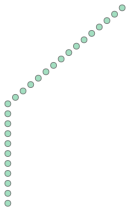

In [ ]:
# Résultat attendu ci-dessous...

***
## 3. Appliquer des transformations 

<div class="alert alert-block alert-info">
<b>Info:</b><br>     On souhaite obtenir des géométries dans le système Lambert Belge 1972 en prenant en compte des informations suivantes:   <br>
    Le point B a fait l'objet d'un relevé au DGPS. Ses coordonnées dans le système WGS84 sont (4.890424E, 50.184786N).  
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez le point B.
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Utilisez pyproj pour définir les systèmes de coordonnées dans lesquels les différentes coordonnées seront exprimées.
</div>

In [8]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303033223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030332220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e7767733834203d20707970726f6a2e4352532827455053473a3433323627293c62723e0a6c623732203d20707970726f6a2e4352532827455053473a333133373027290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Définissez la transformation entre les systèmes de coordonnées WGS84 et LB72 et créez un objet représenatant le point de repère B dans le système LB72.
</div>

In [9]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303034223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030342220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e70726f6a656374203d20707970726f6a2e5472616e73666f726d65722e66726f6d5f6372732877677338342c206c6237322c20616c776179735f78793d54727565292e7472616e73666f726d3c62723e0a425f4c423732203d207472616e73666f726d2870726f6a6563742c20425f5747533834290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez des objets représentant les repères, le profil et les stations de mesure dans le système LB72.
</div>

In [10]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303035223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030352220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6478203d20425f4c4237322e78202d20422e783c62723e0a6479203d20425f4c4237322e79202d20422e790a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


***
## 4. Créer des Buffers autour des géométries converties en Lambert72

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez un buffer de 5m autour des repères. 
</div>

In [12]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303036223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030362220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e726570657265735f4c4237325f627566666572203d20726570657265735f4c4237322e62756666657228352e290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez un buffer de 2.5 m autour du profil et des stations de mesure. 
</div>

***
## 5. Afficher toutes les géométries simultanément

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Utilisez le package <i>descartes</i> pour afficher les points de repère, les stations de mesures et le profil sur une même image.
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la méthode <i>PolygonPatch</i> de <i>descartes</i> pour créer des patches que l'on peut afficher avec <i>matplotlib</i>.
</div>

In [14]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303037223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030372220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e706d5f7061746368203d20506f6c79676f6e50617463682873746174696f6e735f64655f6d65737572655f4c4237325f6275666665722c2066616365636f6c6f723d2723393963636666272c2065646765636f6c6f723d272336363939636327293c62723e0a72705f7061746368203d20506f6c79676f6e506174636828726570657265735f4c4237325f6275666665722c2066616365636f6c6f723d2723636339396666272c2065646765636f6c6f723d272339393636636327293c62723e0a7072665f7061746368203d20506f6c79676f6e50617463682870726f66696c5f4c4237325f6275666665722c2066616365636f6c6f723d2723636366663939272c2065646765636f6c6f723d272339396363363627293c62723e0a3c62723e0a6669672c206178203d20706c742e737562706c6f74732866696773697a653d28382c203829293c62723e0a3c62723e0a61782e6164645f70617463682872705f7061746368293c62723e0a61782e6164645f7061746368287072665f7061746368293c62723e0a61782e6164645f706174636828706d5f7061746368293c62723e0a3c62723e0a61782e72656c696d28293c62723e0a61782e617869732827657175616c27290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


***
## 6. Exporter les points

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Utilisez le package <i>fiona</i> pour exporter les points de repères et les stations de mesure.</b><br> Essayez les exports vers les formats shapefile, geojson et geopackage. 
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Jusqu'ici nous n'avons considéré que la géométrie. A présent, on veut représenter les entités (<i>features</i>) géographiques. Vous devrez associer les noms des entités aux entités. On pourrait utiliser un geodataframe mais on va ici se limiter la manipulation de dictionnaires.
</div>

In [15]:
fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Exportez les repères aux formats ESRI shapefile, geojson et geopackage...
</div>

In [16]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303038223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030382220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e736368656d615f72657065726573203d207b2767656f6d65747279273a2027506f696e74272c202770726f70657274696573273a204f72646572656444696374285b28276e616d65272c202773747227295d297d3c62723e0a6372735f72657065726573203d2066726f6d5f65707367283331333730293c62723e0a726570657265735f6e616d65733d282741272c202742272c20274327293c62723e0a726570657265735f6c697374203d205b7472616e736c61746528692c2064782c2064792920666f72206920696e2028412c20422c2043295d3c62723e0a6665617475726573203d205b5d3c62723e0a666f72206920696e2072616e6765286c656e28726570657265735f6c69737429293a3c62723e0a2020202066656174757265203d207b2767656f6d65747279273a20726570657265735f6c6973745b695d2e5f5f67656f5f696e746572666163655f5f7d3c62723e0a20202020666561747572652e757064617465287b2770726f70657274696573273a204f72646572656444696374285b28276e616d65272c20726570657265735f6e616d65735b695d295d297d293c62723e0a2020202066656174757265732e617070656e642866656174757265293c62723e0a66656174757265730a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [17]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303039223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030392220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6f757470757473203d207b274553524920536861706566696c65273a2027726570657265732e736870272c202747656f4a534f4e273a2027726570657265732e67656f6a736f6e272c202747504b47273a2027726570657265732e67706b67277d3c62723e0a666f72206472697665722c2066696c656e616d6520696e206f7574707574732e6974656d7328293a3c62723e0a20202020776974682066696f6e612e6f70656e2866696c656e616d652c202777272c206472697665723d6472697665722c206372733d6372735f726570657265732c20736368656d613d736368656d615f72657065726573292061732066696c653a3c62723e0a202020202020202066696c652e77726974657265636f726473286665617475726573290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Exportez les mesures aux formats ESRI shapefile, geojson et geopackage...
</div>